In [89]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import streamlit as st
import joblib



In [118]:
DATA_PATH = "../data/arabalar.csv"  
df = pd.read_csv(DATA_PATH)

In [119]:
df.head()

,İlan No,İlan Tarihi,Marka,Seri,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,...,Takasa Uygun,Kimden,Fiyat,Ağır Hasarlı,Motor Gücü (kW),Batarya Voltajı (V),Menzil,Şarj Süresi,Pil Kapasitesi (kWh),Plaka Uyruğu
0,Kopyalandı30614134,30 Haziran 2025,Peugeot,206,1.6 XT,2002,155.000 km,Otomatik,LPG & Benzin,Hatchback/5,...,Takasa Uygun,Galeriden,399.000 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kopyalandı30613096,30 Haziran 2025,Hyundai,Accent Era,1.5 CRDi Team,2011,238.500 km,Otomatik,Dizel,Sedan,...,Takasa Uygun Değil,Galeriden,449.000 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kopyalandı22947396,30 Haziran 2025,Audi,A3,A3 Sportback 1.6 TDI Ambiente,2013,134.500 km,Yarı Otomatik,Dizel,Hatchback/5,...,Takasa Uygun,Galeriden,1.150.000 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Kopyalandı26664088,30 Haziran 2025,Fiat,Egea,1.4 Fire Easy,2021,21.500 km,Düz,Benzin,Sedan,...,Takasa Uygun,Galeriden,749.000 TL,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kopyalandı30600487,30 Haziran 2025,Mercedes - Benz,E,250 CDI AMG,2011,228.000 km,Otomatik,Dizel,Coupe,...,Takasa Uygun Değil,Sahibinden,1.150.000 TL,Evet,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   İlan No               2450 non-null   object 
 1   İlan Tarihi           2450 non-null   object 
 2   Marka                 2450 non-null   object 
 3   Seri                  2450 non-null   object 
 4   Model                 2446 non-null   object 
 5   Yıl                   2450 non-null   int64  
 6   Kilometre             2450 non-null   object 
 7   Vites Tipi            2450 non-null   object 
 8   Yakıt Tipi            2450 non-null   object 
 9   Kasa Tipi             2450 non-null   object 
 10  Renk                  2450 non-null   object 
 11  Motor Hacmi           2401 non-null   object 
 12  Motor Gücü            2403 non-null   object 
 13  Çekiş                 2416 non-null   object 
 14  Araç Durumu           2450 non-null   object 
 15  Ort. Yakıt Tüketimi  

In [93]:
df.describe()

,Yıl,Şarj Süresi
count,2450.000000,8.000000
mean,2012.173878,19.125000
std,8.122730,12.391673
min,1975.000000,1.000000
25%,2008.000000,8.500000
50%,2013.000000,24.000000
75%,2018.000000,30.000000
max,2025.000000,30.000000


In [94]:
df.isnull().sum()

İlan No                    0
İlan Tarihi                0
Marka                      0
Seri                       0
Model                      4
Yıl                        0
Kilometre                  0
Vites Tipi                 0
Yakıt Tipi                 0
Kasa Tipi                  0
Renk                       0
Motor Hacmi               49
Motor Gücü                47
Çekiş                     34
Araç Durumu                0
Ort. Yakıt Tüketimi      888
Yakıt Deposu             775
Boya-değişen               0
Takasa Uygun             607
Kimden                     0
Fiyat                      0
Ağır Hasarlı            2404
Motor Gücü (kW)         2442
Batarya Voltajı (V)     2442
Menzil                  2442
Şarj Süresi             2442
Pil Kapasitesi (kWh)    2442
Plaka Uyruğu            2442
dtype: int64

In [95]:
gereksiz_sutunlar = [
    "İlan No", "İlan Tarihi", "Ağır Hasarlı", "Motor Gücü (kW)",
    "Batarya Voltajı (V)", "Menzil", "Şarj Süresi",
    "Pil Kapasitesi (kWh)", "Plaka Uyruğu"
]

In [96]:
df.drop(columns=gereksiz_sutunlar, inplace=True, errors="ignore")

In [97]:
def temizle_sayisal(x):
    if isinstance(x, str):
        return (
            x.replace(".", "")
             .replace(",", ".")
             .replace("TL", "")
             .replace("km", "")
             .replace("cc", "")
             .replace("hp", "")
             .strip()
        )
    return x


In [98]:
sayisal_sutunlar = ["Fiyat", "Kilometre", "Motor Hacmi", "Motor Gücü"]

for s in sayisal_sutunlar:
    df[s] = df[s].apply(temizle_sayisal)
    df[s] = pd.to_numeric(df[s], errors="coerce")

In [99]:
df["Motor Hacmi"].fillna(df["Motor Hacmi"].mean(), inplace=True)
df["Motor Gücü"].fillna(df["Motor Gücü"].mean(), inplace=True)
df["Takasa Uygun"].fillna("Bilinmiyor", inplace=True)

In [100]:
df["Araç Yaşı"] = 2025 - df["Yıl"]

In [101]:
df["Fiyat"] = df["Fiyat"].astype(int)

In [102]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marka                2450 non-null   object 
 1   Seri                 2450 non-null   object 
 2   Model                2446 non-null   object 
 3   Yıl                  2450 non-null   int64  
 4   Kilometre            2450 non-null   int64  
 5   Vites Tipi           2450 non-null   object 
 6   Yakıt Tipi           2450 non-null   object 
 7   Kasa Tipi            2450 non-null   object 
 8   Renk                 2450 non-null   object 
 9   Motor Hacmi          2450 non-null   float64
 10  Motor Gücü           2450 non-null   float64
 11  Çekiş                2416 non-null   object 
 12  Araç Durumu          2450 non-null   object 
 13  Ort. Yakıt Tüketimi  1562 non-null   object 
 14  Yakıt Deposu         1675 non-null   object 
 15  Boya-değişen         2450 non-null   o

In [103]:
df.head()

,Marka,Seri,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Araç Durumu,Ort. Yakıt Tüketimi,Yakıt Deposu,Boya-değişen,Takasa Uygun,Kimden,Fiyat,Araç Yaşı
0,Peugeot,206,1.6 XT,2002,155000,Otomatik,LPG & Benzin,Hatchback/5,Kırmızı,1587.0,109.0,Önden Çekiş,İkinci El,"7,4 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden,399000,23
1,Hyundai,Accent Era,1.5 CRDi Team,2011,238500,Otomatik,Dizel,Sedan,Beyaz,1493.0,110.0,Önden Çekiş,İkinci El,"5,9 lt",45 lt,"2 değişen, 5 boyalı",Takasa Uygun Değil,Galeriden,449000,14
2,Audi,A3,A3 Sportback 1.6 TDI Ambiente,2013,134500,Yarı Otomatik,Dizel,Hatchback/5,Beyaz,1598.0,105.0,Önden Çekiş,İkinci El,"3,9 lt",50 lt,1 boyalı,Takasa Uygun,Galeriden,1150000,12
3,Fiat,Egea,1.4 Fire Easy,2021,21500,Düz,Benzin,Sedan,Gri,1368.0,95.0,Önden Çekiş,İkinci El,"6,4 lt",45 lt,Tamamı orjinal,Takasa Uygun,Galeriden,749000,4
4,Mercedes - Benz,E,250 CDI AMG,2011,228000,Otomatik,Dizel,Coupe,Beyaz,2143.0,204.0,Arkadan İtiş,İkinci El,"6,1 lt",59 lt,5 değişen,Takasa Uygun Değil,Sahibinden,1150000,14


In [104]:
df.drop(columns=["Ort. Yakıt Tüketimi", "Yakıt Deposu"], inplace=True, errors="ignore")

In [105]:
df["Çekiş"].fillna(df["Çekiş"].mode()[0], inplace=True)   
df["Model"].fillna("Bilinmiyor", inplace=True)   

In [106]:
kategorik_sutunlar = [
    "Marka", "Seri", "Model", "Vites Tipi", 
    "Yakıt Tipi", "Kasa Tipi", "Renk", 
    "Çekiş", "Araç Durumu", "Boya-değişen",
    "Takasa Uygun", "Kimden"
]

In [107]:
label_encoders = {}
for sutun in kategorik_sutunlar:
    le = LabelEncoder()
    df[sutun] = le.fit_transform(df[sutun].astype(str))
    label_encoders[sutun] = le  # her encoder'ı ayrı sakla


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Marka         2450 non-null   int32  
 1   Seri          2450 non-null   int32  
 2   Model         2450 non-null   int32  
 3   Yıl           2450 non-null   int64  
 4   Kilometre     2450 non-null   int64  
 5   Vites Tipi    2450 non-null   int32  
 6   Yakıt Tipi    2450 non-null   int32  
 7   Kasa Tipi     2450 non-null   int32  
 8   Renk          2450 non-null   int32  
 9   Motor Hacmi   2450 non-null   float64
 10  Motor Gücü    2450 non-null   float64
 11  Çekiş         2450 non-null   int32  
 12  Araç Durumu   2450 non-null   int32  
 13  Boya-değişen  2450 non-null   int32  
 14  Takasa Uygun  2450 non-null   int32  
 15  Kimden        2450 non-null   int32  
 16  Fiyat         2450 non-null   int32  
 17  Araç Yaşı     2450 non-null   int64  
dtypes: float64(2), int32(13), in

In [109]:
df.head()

,Marka,Seri,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Araç Durumu,Boya-değişen,Takasa Uygun,Kimden,Fiyat,Araç Yaşı
0,25,7,656,2002,155000,1,4,4,10,1587.0,109.0,4,0,65,2,0,399000,23
1,16,35,356,2011,238500,1,1,8,1,1493.0,110.0,4,0,25,3,0,449000,14
2,1,29,862,2013,134500,2,1,4,1,1598.0,105.0,4,0,0,2,0,1150000,12
3,12,79,242,2021,21500,0,0,8,5,1368.0,95.0,4,0,67,2,0,749000,4
4,20,78,767,2011,228000,1,1,2,1,2143.0,204.0,3,0,52,3,1,1150000,14


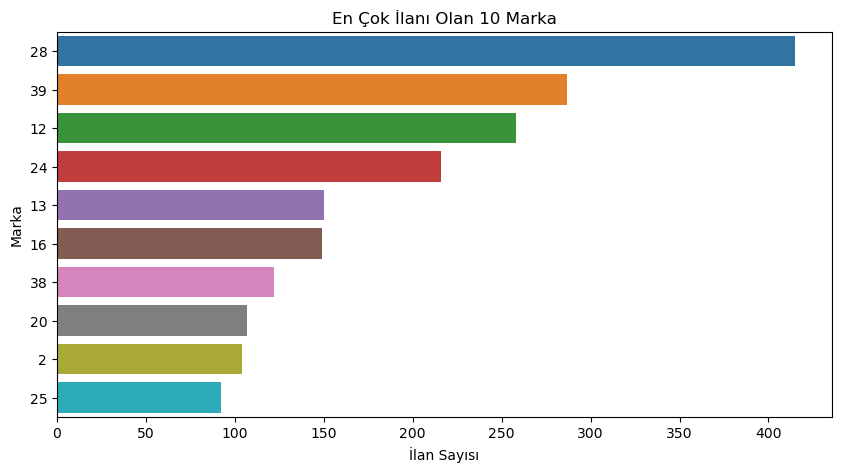

In [110]:
# En çok ilanı olan 10 marka
plt.figure(figsize=(10,5))
sns.countplot(y="Marka", data=df, order=df["Marka"].value_counts().index[:10])
plt.title("En Çok İlanı Olan 10 Marka")
plt.xlabel("İlan Sayısı")
plt.ylabel("Marka")
plt.show()


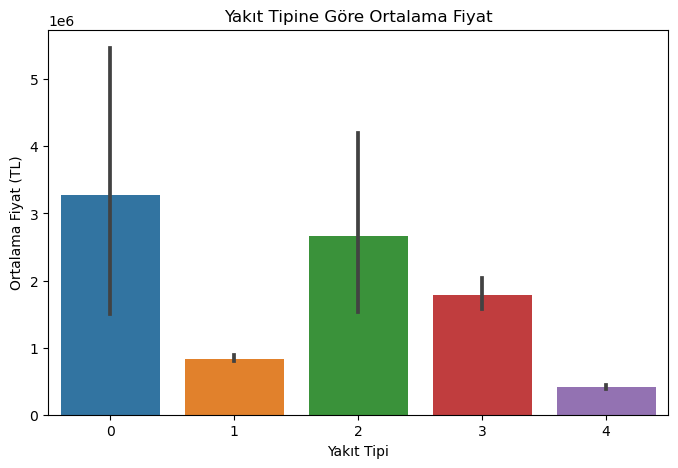

In [111]:
# Yakıt tipine göre ortalama fiyat
plt.figure(figsize=(8,5))
sns.barplot(x="Yakıt Tipi", y="Fiyat", data=df, estimator=np.mean)
plt.title("Yakıt Tipine Göre Ortalama Fiyat")
plt.ylabel("Ortalama Fiyat (TL)")
plt.show()


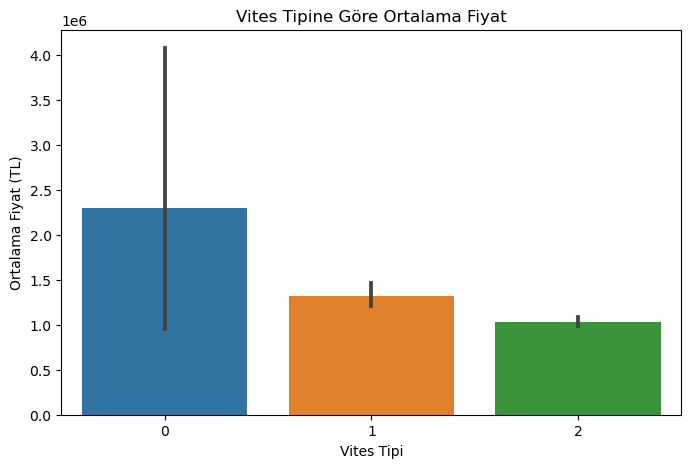

In [112]:
# Vites tipine göre ortalama fiyat
plt.figure(figsize=(8,5))
sns.barplot(x="Vites Tipi", y="Fiyat", data=df, estimator=np.mean)
plt.title("Vites Tipine Göre Ortalama Fiyat")
plt.ylabel("Ortalama Fiyat (TL)")
plt.show()

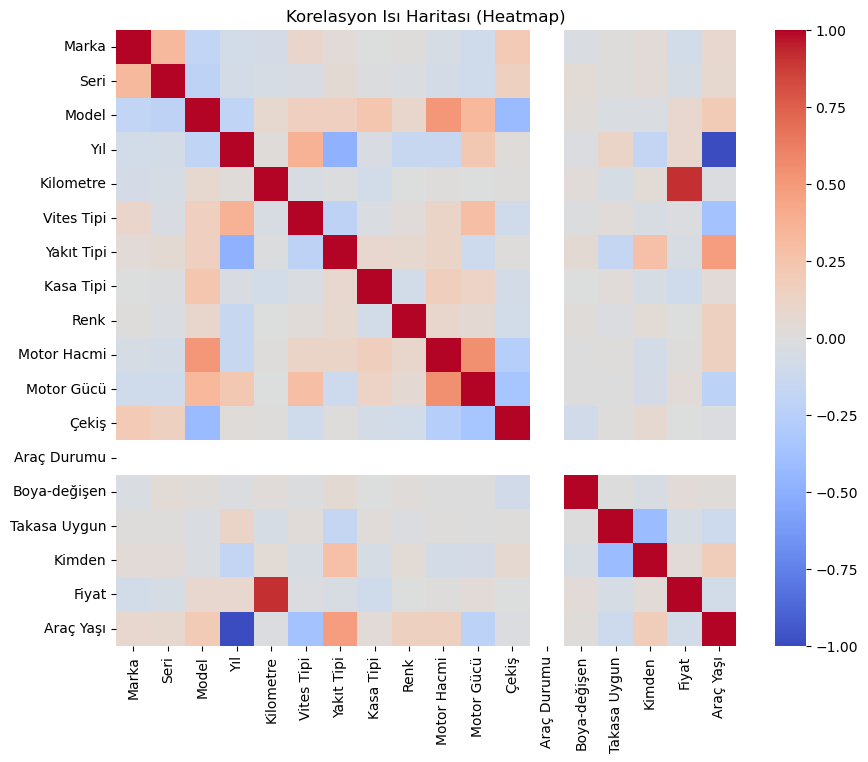

In [113]:
# Korelasyon Isı Haritası
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Korelasyon Isı Haritası (Heatmap)")
plt.show()

In [114]:
# 🔧 Modellemeye geçmeden önce sadece sayısal sütunları alalım
X = df[["Marka","Model","Motor Hacmi", "Motor Gücü", "Kilometre", "Araç Yaşı", "Yakıt Tipi"]]
y = df["Fiyat"]

X = X.drop(columns=["Fiyat"], errors="ignore")

# Eğitim-test ayrımı
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Sonuçları karşılaştıralım
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"\n📊 {model_name} Sonuçları")
    print(f"MAE  : {mae:,.2f}")
    print(f"RMSE : {rmse:,.2f}")
    print(f"R²   : {r2:.3f}")

evaluate_model(y_test, y_pred_lin, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


📊 Linear Regression Sonuçları
MAE  : 1,054,379.61
RMSE : 2,158,806.82
R²   : 0.993

📊 Random Forest Regressor Sonuçları
MAE  : 208,703.64
RMSE : 1,243,234.61
R²   : 0.998


In [121]:
# ------------------------------------------------------------
import joblib, os

# klasörleri oluştur
os.makedirs("../model", exist_ok=True)

# model ve encoder'ları kaydet
joblib.dump(rf_model, "../model/arabam_fiyat_tahmin_modeli.pkl")
joblib.dump(label_encoders, "../model/label_encoders.pkl")

print("✅ Model ve encoder ../model klasörüne başarıyla kaydedildi.")



✅ Model ve encoder ../model klasörüne başarıyla kaydedildi.


In [116]:
df.head()

,Marka,Seri,Model,Yıl,Kilometre,Vites Tipi,Yakıt Tipi,Kasa Tipi,Renk,Motor Hacmi,Motor Gücü,Çekiş,Araç Durumu,Boya-değişen,Takasa Uygun,Kimden,Fiyat,Araç Yaşı
0,25,7,656,2002,155000,1,4,4,10,1587.0,109.0,4,0,65,2,0,399000,23
1,16,35,356,2011,238500,1,1,8,1,1493.0,110.0,4,0,25,3,0,449000,14
2,1,29,862,2013,134500,2,1,4,1,1598.0,105.0,4,0,0,2,0,1150000,12
3,12,79,242,2021,21500,0,0,8,5,1368.0,95.0,4,0,67,2,0,749000,4
4,20,78,767,2011,228000,1,1,2,1,2143.0,204.0,3,0,52,3,1,1150000,14
